In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
print('libraries have been imported')

libraries have been imported


In [2]:
data=pd.read_csv('cleaned_hr_data')

In [3]:
data.head()

,Unnamed: 0,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Total_w_days,AvgHours,TotalHours
0,0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,...,1.0,6,1,0,0,3,3,232,7.37,1710.69
1,1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,...,6.0,3,5,1,4,2,4,236,7.72,1821.68
2,2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,...,5.0,2,5,0,3,3,3,242,7.01,1697.20
3,3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,...,13.0,5,8,7,5,2,3,235,7.19,1690.51
4,4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,...,9.0,2,6,0,4,3,3,245,8.01,1961.51


In [4]:
data.tail()

,Unnamed: 0,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Total_w_days,AvgHours,TotalHours
4405,4405,4406,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,...,10.0,5,3,0,2,3,3,243,8.52,2070.91
4406,4406,4407,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,...,10.0,2,3,0,2,2,3,241,6.09,1468.40
4407,4407,4408,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,...,5.0,4,4,1,2,3,4,231,7.71,1780.23
4408,4408,4409,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,18,...,10.0,2,9,7,8,2,3,241,9.49,2287.72
4409,4409,4410,1.0,3.0,3.0,40,No,Travel_Rarely,Research & Development,28,...,10.0,6,21,3,9,4,3,232,6.99,1621.44


In [5]:
data.shape

(4410, 33)

In [6]:
data.isnull().sum() # let's drop column Unnamed

Unnamed: 0                 0
EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
Total_w_days               0
AvgHours                   0
TotalHours                 0
dtype: int64

In [7]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [8]:
data.drop(['Over18'], inplace=True, axis=1)

In [9]:
data.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'Total_w_days', 'AvgHours',
       'TotalHours'],
      dtype='object')

In [10]:
# We will perform a logistic regression to predict the outcome for test data, 
# and validate the results by using the confusion matrix.

In [11]:
# let's copy the data frame into a new one
data1=data.copy()

In [12]:
data1.shape

(4410, 31)

In [13]:
data1.dtypes

EmployeeID                   int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobInvolvement               int64
PerformanceRating            int64
Total_w_days        

In [14]:
data1.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'Total_w_days', 'AvgHours',
       'TotalHours'],
      dtype='object')

In [15]:
data1.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Total_w_days,AvgHours,TotalHours
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,1.0,6,1,0,0,3,3,232,7.37,1710.69
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,6.0,3,5,1,4,2,4,236,7.72,1821.68
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,5.0,2,5,0,3,3,3,242,7.01,1697.20
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,13.0,5,8,7,5,2,3,235,7.19,1690.51
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,9.0,2,6,0,4,3,3,245,8.01,1961.51


In [17]:
# Get dummy columns for 'Attrition', 'BusinessTravel', 'Department', 'EducationField','Gender','JobRole',
#'MaritalStatus'
data1=pd.get_dummies(data1, columns = ['BusinessTravel', 'Department', 'EducationField','Gender','JobRole','MaritalStatus'])

In [18]:
data1.dtypes


EmployeeID                             int64
EnvironmentSatisfaction              float64
JobSatisfaction                      float64
WorkLifeBalance                      float64
Age                                    int64
Attrition                             object
DistanceFromHome                       int64
Education                              int64
EmployeeCount                          int64
JobLevel                               int64
MonthlyIncome                          int64
NumCompaniesWorked                   float64
PercentSalaryHike                      int64
StandardHours                          int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                  int64
YearsAtCompany                         int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                   int64
JobInvolvement                         int64
PerformanceRating                      int64
Total_w_da

In [19]:
data1.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,EmployeeCount,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,3.0,4.0,2.0,51,No,6,2,1,1,...,0,0,0,0,0,0,0,0,1,0
1,2,3.0,2.0,4.0,31,Yes,10,1,1,1,...,0,0,0,0,1,0,0,0,0,1
2,3,2.0,2.0,1.0,32,No,17,4,1,4,...,0,0,0,0,0,1,0,0,1,0
3,4,4.0,4.0,3.0,38,No,2,5,1,3,...,0,0,0,0,0,0,0,0,1,0
4,5,4.0,1.0,3.0,32,No,10,1,1,1,...,0,0,0,0,0,1,0,0,0,1


In [20]:
#data1.Attrition = data1.Attrition.astype(float)
#data1['Travel_Rarely'].astype(float)

We need to split our feacture columns from our target columns 'Attrition'. 
we will use the feactures columns to predict the target columns

In [21]:
x=data1.drop(columns='Attrition',axis=1)
y=data1['Attrition']

Data split into training data and testing data. first we'll need to create train and test variable for x and y

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)

In [23]:
# let's check the shape our our train and test data
print(x_train.shape, x_test.shape)

(3528, 50) (882, 50)


In [24]:
# Model used: Logistic Regression
Model_var= LogisticRegression()

In [25]:
# training  Model_var with training data
Model_var.fit(x_train, y_train)

LogisticRegression()

In [26]:
# Training accuracy:
x_train_predict = Model_var.predict(x_train)
train_accuracy = accuracy_score(x_train_predict, y_train)

In [27]:
print('Training Accuracy: ', train_accuracy)

Training Accuracy:  0.8438208616780045


In [28]:
# Test accuracy:
x_test_predict = Model_var.predict(x_test)
test_accuracy = accuracy_score(x_test_predict, y_test)

In [29]:
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.8390022675736961


In [30]:
# accuracy calculation Confusion Matrix

In [31]:
confusion_matrix(y_true=y_test, y_pred=x_test_predict)

array([[728,  12],
       [130,  12]], dtype=int64)

In [32]:
Model_var.classes_

array(['No', 'Yes'], dtype=object)

In [71]:
# a new value
data1.iloc[1].to_list()

[2,
 3.0,
 2.0,
 4.0,
 31,
 'Yes',
 10,
 1,
 1,
 1,
 41890,
 0.0,
 23,
 8,
 1,
 6.0,
 3,
 5,
 1,
 4,
 2,
 4,
 236,
 7.72,
 1821.68,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1]

In [34]:
y_test.where(y_test == "Yes").dropna()

3610    Yes
2545    Yes
1681    Yes
1344    Yes
2544    Yes
       ... 
1117    Yes
2491    Yes
2469    Yes
1021    Yes
928     Yes
Name: Attrition, Length: 142, dtype: object

In [35]:
x_test.where(x_test['EmployeeID'] ==  36).dropna()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single


In [36]:
y_new1 = Model_var.predict(pd.DataFrame(x_test.iloc[35].tolist()).T)
y_new1

array(['No'], dtype=object)

In [37]:
y_test.iloc[35]

'No'

In [38]:
y_test.where(y_test=='Yes').dropna()
indexes= y_test.where(y_test=='Yes').dropna().index.to_list()
indexes

[3610,
 2545,
 1681,
 1344,
 2544,
 1339,
 670,
 3271,
 1121,
 4197,
 2999,
 289,
 3513,
 2435,
 2581,
 3739,
 4329,
 1921,
 3694,
 2449,
 402,
 13,
 3718,
 4276,
 1238,
 2771,
 3277,
 1428,
 1138,
 1956,
 758,
 1819,
 1991,
 1033,
 570,
 2159,
 4402,
 504,
 2483,
 2874,
 878,
 3052,
 1348,
 1937,
 798,
 748,
 538,
 1578,
 2708,
 1448,
 1907,
 127,
 1338,
 1096,
 3407,
 2245,
 3430,
 3713,
 3794,
 519,
 4061,
 178,
 1964,
 4368,
 708,
 2104,
 1848,
 3161,
 2751,
 3759,
 3413,
 4178,
 2502,
 246,
 6,
 1774,
 437,
 2525,
 4015,
 2164,
 59,
 310,
 1803,
 3177,
 3688,
 4051,
 749,
 2818,
 2178,
 2187,
 4292,
 1074,
 722,
 1901,
 1013,
 1471,
 4278,
 1943,
 4008,
 3931,
 613,
 1878,
 913,
 451,
 1,
 1655,
 221,
 2004,
 2248,
 3104,
 2732,
 2946,
 404,
 4152,
 4388,
 3096,
 2524,
 1895,
 340,
 781,
 435,
 1334,
 4391,
 2887,
 1314,
 754,
 2806,
 2565,
 1881,
 3121,
 425,
 4284,
 3919,
 1633,
 2538,
 1932,
 999,
 1117,
 2491,
 2469,
 1021,
 928]

In [39]:
y_test.loc[1117]

'Yes'

In [40]:
y_new = Model_var.predict(x_test.loc[indexes])
pd.Series(y_new).value_counts()

No     130
Yes     12
dtype: int64

In [41]:
12/142*100 # accuracy for Yes

8.450704225352112

In [42]:
y_test.where(y_test=='No').dropna()
no_indexes= y_test.where(y_test=='No').dropna().index.to_list()
no_indexes

[2335,
 2567,
 1806,
 3902,
 3716,
 2145,
 690,
 285,
 2555,
 3978,
 4403,
 2637,
 2847,
 4028,
 3202,
 567,
 3959,
 4385,
 303,
 3227,
 3105,
 3732,
 1894,
 3927,
 4046,
 3367,
 1381,
 1816,
 4228,
 3643,
 1720,
 1929,
 2362,
 3071,
 324,
 3545,
 1287,
 301,
 2468,
 582,
 2254,
 2107,
 3049,
 2821,
 3638,
 3837,
 4094,
 3211,
 2142,
 903,
 2747,
 1834,
 2046,
 3583,
 2832,
 2802,
 2108,
 2848,
 3965,
 3012,
 1250,
 1188,
 2422,
 3762,
 989,
 4198,
 34,
 3562,
 2223,
 3558,
 2750,
 710,
 4240,
 1712,
 3824,
 3320,
 136,
 3194,
 1397,
 753,
 3680,
 3429,
 2647,
 2924,
 3190,
 3695,
 483,
 1492,
 2681,
 780,
 129,
 1512,
 1818,
 2472,
 3751,
 3914,
 1537,
 1830,
 2827,
 640,
 1766,
 1542,
 345,
 2314,
 3538,
 3234,
 3376,
 102,
 616,
 2338,
 2334,
 813,
 3057,
 3188,
 4053,
 523,
 3668,
 3160,
 944,
 60,
 3673,
 436,
 4307,
 465,
 4117,
 732,
 1564,
 2419,
 2662,
 2253,
 2087,
 1968,
 2112,
 1390,
 2561,
 4268,
 1746,
 2368,
 1222,
 2055,
 3497,
 15,
 1360,
 1294,
 2768,
 472,
 20,
 3272

In [43]:
y_new2 = Model_var.predict(x_test.loc[no_indexes])
pd.Series(y_new2).value_counts()

No     728
Yes     12
dtype: int64

In [44]:
728/740*100 # accuracy for No

98.37837837837839

In [45]:
confusion_matrix(y_true=y_test, y_pred=x_test_predict)


array([[728,  12],
       [130,  12]], dtype=int64)

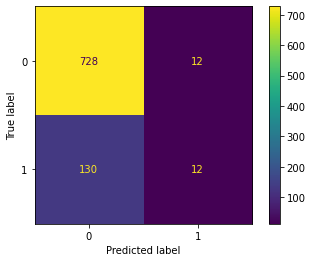

In [65]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

(TN=728, FP=12), (FN=130, TP=12)

In [70]:
accuracy=((728+12)/(728+12+12+130))*100
print(accuracy)

83.90022675736961
